In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline
np.set_printoptions(threshold = 1000)# to display no cut matrix -> 'np.inf'

In [5]:
data_dir = "./"
data = pd.read_csv(data_dir + "USD_JPY_2009-2019.csv")

In [6]:
data2 = np.array(data)
data2

array([['2009-01-05', 92.11, 93.55, 91.8, 93.19],
       ['2009-01-06', 93.19, 94.59, 92.85, 93.42],
       ['2009-01-07', 93.43, 94.12, 92.33, 92.55],
       ...,
       ['2019-02-18', 110.50399999999999, 110.65799999999999, 110.459,
        110.616],
       ['2019-02-19', 110.616, 110.823, 110.456, 110.586],
       ['2019-02-20', 110.587, 110.95, 110.565, 110.804]], dtype=object)

In [7]:
#5-day moving average line
data2 = np.c_[data2, np.zeros((len(data2), 1))]
ave_days = 5
for i in range(ave_days, len(data2) + 1):
    tmp = data2[i - ave_days:i, 4].astype(np.float)
    data2[i - 1, 5] = np.mean(tmp)

In [8]:
#25-day moving average line
data2 = np.c_[data2, np.zeros((len(data2), 1))]
ave_days = 25
for i in range(ave_days, len(data2) + 1):
    tmp = data2[i-ave_days:i, 4].astype(np.float)
    data2[i - 1, 6] = np.mean(tmp)

In [9]:
#75-day moving average line
data2 = np.c_[data2, np.zeros((len(data2), 1))]
ave_days = 75
for i in range(ave_days, len(data2) + 1):
    tmp = data2[i - ave_days:i, 4].astype(np.float)
    data2[i - 1, 7] = np.mean(tmp)

In [10]:
#200-day moving average line
data2 = np.c_[data2, np.zeros((len(data2), 1))]
ave_days = 200
for i in range(ave_days, len(data2) + 1):
    tmp = data2[i - ave_days:i, 4].astype(np.float)
    data2[i - 1, 8] = np.mean(tmp)

In [11]:
data2

array([['2009-01-05', 92.11, 93.55, ..., 0.0, 0.0, 0.0],
       ['2009-01-06', 93.19, 94.59, ..., 0.0, 0.0, 0.0],
       ['2009-01-07', 93.43, 94.12, ..., 0.0, 0.0, 0.0],
       ...,
       ['2019-02-18', 110.50399999999999, 110.65799999999999, ...,
        109.72884, 111.23270666666666, 111.275945],
       ['2019-02-19', 110.616, 110.823, ..., 109.80616,
        111.19766666666665, 111.282305],
       ['2019-02-20', 110.587, 110.95, ..., 109.87348, 111.16568,
        111.28786]], dtype=object)

In [12]:
# ichimoku
para1 = 9
para2 = 26
para3 = 52

In [13]:
data2 = np.c_[data2,np.zeros((len(data2), 1))] # Conversion line
for i in range(para1, len(data2) + 1):
    tmp_high = data2[i - para1:i, 2].astype(np.float)
    tmp_low = data2[i - para1:i, 3].astype(np.float)
    data2[i - 1, 9] = (np.max(tmp_high) + np.min(tmp_low)) / 2

In [14]:
data2 = np.c_[data2,np.zeros((len(data2), 1))] # Base line
for i in range(para2, len(data2) + 1):
    tmp_high = data2[i - para2:i, 2].astype(np.float)
    tmp_low = data2[i - para2:i, 3].astype(np.float)
    data2[i - 1, 10] = (np.max(tmp_high) + np.min(tmp_low)) / 2

In [15]:
data2 = np.c_[data2,np.zeros((len(data2), 1))] # leading span 1
for i in range(0, len(data2) - para2):
    tmp = (data2[i, 9] + data2[i, 10]) / 2
    data2[i + para2, 11] = tmp

In [16]:
data2[1]

array(['2009-01-06', 93.19, 94.59, 92.85, 93.42, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0], dtype=object)

In [17]:
data2 = np.c_[data2,np.zeros((len(data2), 1))] # leading span 2
for i in range(para3, len(data2) - para2 + 1):
    tmp_high = data2[i - para3:i, 2].astype(np.float)
    tmp_low = data2[i - para3:i, 3].astype(np.float)
    data2[i + para2 - 1, 12] = (np.max(tmp_high) + np.min(tmp_low)) / 2
    

In [18]:
data2

array([['2009-01-05', 92.11, 93.55, ..., 0.0, 0.0, 0.0],
       ['2009-01-06', 93.19, 94.59, ..., 0.0, 0.0, 0.0],
       ['2009-01-07', 93.43, 94.12, ..., 0.0, 0.0, 0.0],
       ...,
       ['2019-02-18', 110.50399999999999, 110.65799999999999, ...,
        109.557, 108.4745, 109.53150000000001],
       ['2019-02-19', 110.616, 110.823, ..., 109.63300000000001,
        108.28725, 109.53150000000001],
       ['2019-02-20', 110.587, 110.95, ..., 109.7495, 108.57024999999999,
        109.53150000000001]], dtype=object)

In [19]:
# 25-day Bollinger Bands
day = 25
data2 = np.c_[data2,np.zeros((len(data2), 4))]
for i in range(day, len(data2) + 1):
    tmp = data2[i - day:i, 4].astype(np.float)
    data2[i - 1, 13] = np.mean(tmp) + 1.0 * np.std(tmp)
    data2[i - 1, 14] = np.mean(tmp) - 1.0 * np.std(tmp)
    data2[i - 1, 15] = np.mean(tmp) + 2.0 * np.std(tmp)
    data2[i - 1, 16] = np.mean(tmp) - 2.0 * np.std(tmp)

In [20]:
data2[199]

array(['2009-10-09', 88.37, 89.87, 88.35, 89.75, 89.002, 90.5684,
       93.21853333333334, 94.69743999999999, 89.20500000000001, 90.65,
       94.1875, 94.75999999999999, 91.75226715470951, 89.38453284529048,
       92.93613430941902, 88.20066569058098], dtype=object)

In [21]:
day_ago = 25
index_num = 1 + 4 + 4 + 4

X = np.zeros((len(data2), day_ago * index_num))

for j in range(0, index_num):
    for i in range(0, day_ago):
        X[i:len(data2), day_ago * j + i] = data2[0:len(data2) - i, j + 4]

In [22]:
#show_data = pd.DataFrame(X)
#show_data

In [23]:
Y = np.zeros(len(data2))

pre_day = 1
Y[0:len(Y) - pre_day] = X[pre_day:len(X), 0] - X[0:len(X) - pre_day, 0]

In [24]:
#show_data = pd.DataFrame(Y)
#show_data

In [25]:
# X,Y normalization
origin_X = np.copy(X)
tmp_mean = np.zeros(len(X))

for i in range(day_ago, len(X)):
    tmp_mean[i] = np.mean(origin_X[i - day_ago:i, 0])
    for j in range(0, X.shape[1]):
        X[i, j] = (X[i, j] - tmp_mean[i])
    Y[i] = Y[i]

In [26]:
data[data['Date'].str.match('2018.*')].head()

,Date,Open,High,Low,Close
2332,2018-01-02,112.602,112.793,112.057,112.232
2333,2018-01-03,112.231,112.609,112.173,112.546
2334,2018-01-04,112.547,112.866,112.491,112.777
2335,2018-01-05,112.777,113.309,112.724,113.116
2336,2018-01-08,113.113,113.387,112.884,113.157


In [27]:
X_train = X[200:2332]
Y_train = Y[200:2332]

X_test = X[2332:len(X) - pre_day, :]
Y_test = Y[2332:len(Y) - pre_day]

In [34]:
# linear regression
from sklearn import linear_model
linear_reg_model = linear_model.LinearRegression()

linear_reg_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
print(linear_reg_model.intercept_)
print(linear_reg_model.coef_)

0.03300723107715485
[ 2.51534168e+11  2.71698033e+11  2.34014890e+11  1.71634976e+11
  1.66191547e+11 -4.74332286e+08  4.18680457e+10  6.19645667e+10
  5.51757409e+10  5.80205185e+10  4.59054511e+10  4.09410664e+10
  3.44142544e+10  3.48522610e+10  3.95598326e+10  4.47309426e+10
  5.02898112e+10  5.56977795e+10  6.60264918e+10  6.55381949e+10
  6.54999557e+10  2.39922954e+09  2.11046947e+10  7.95067160e+10
  7.78860921e+10 -8.18407672e+11  2.52436009e+11  1.35351735e+11
  5.35135383e+10  8.80371013e+10  1.49217260e+10  4.07241193e+10
  3.48691298e+10  8.74576674e+10  7.38132130e+10  7.54970630e+10
  6.55460429e+10  6.75031897e+10  8.52676344e+10  5.02753550e+10
  4.96415132e+10  3.77517000e+10  4.04633477e+10  3.36240732e+10
  5.27168395e+10  4.98327091e+10  3.53255331e+11 -5.30639779e+10
 -2.58386033e+11  6.08199586e+10 -4.46012944e+11  3.93616356e+09
  5.03021590e+10  2.61135783e+11 -5.66959224e+10 -1.89348318e+10
 -6.04804592e+09 -1.13509882e+09 -5.67367870e+09  7.60451617e+09
 -3.6

In [30]:
Y_pred = linear_reg_model.predict(X_test)

In [31]:
result = pd.DataFrame(Y_pred)
result.columns = ['Y_pred']
result['Y_test'] = Y_test
result

,Y_pred,Y_test
0,-0.211562,0.314
1,-0.095272,0.231
2,0.008874,0.339
3,0.117963,0.041
4,0.182314,-0.532
5,-0.183560,-1.227
6,0.070664,-0.164
7,-0.124872,-0.217
8,-0.328494,-0.465
9,0.027366,-0.112


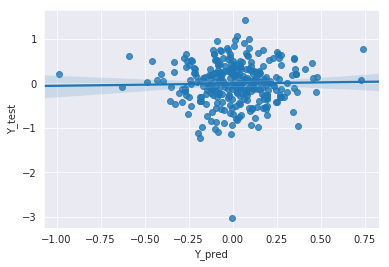

In [32]:
sns.set_style('darkgrid')
sns.regplot(x = 'Y_pred', y = 'Y_test', data = result)

In [33]:
correct_num = 0
for i in range(0, len(Y_test)):
    if Y_pred[i] * Y_test[i] >= 0:
        correct_num += 1
        
print("pred_days: " + str(len(Y_pred)) + " correct_days: " + str(correct_num))
print("percent: " + str(correct_num / len(Y_pred) * 100))

pred_days: 294 correct_days: 147
percent: 50.0


In [ ]:
# 